## Song Recommendation 

In [1]:
import pandas as pd
import numpy.linalg as la
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=3)

In [2]:
def evaluate_RMSE(test, P, Q):
    y_hat = np.zeros([test.shape[0],1])
    y = test[:,2]
    c = 0
    for row in test:
        y_hat[c] = P[row[0],:].dot(Q[row[1],:].T)
        c +=1
    return RMSE(y_hat, y)

def RMSE(y_hat, y): # y_hat --> observed, y --> prediction, they both are col vectors    
    return np.sqrt(np.mean((y - y_hat)**2)) 

def R_to_M(n, m, R):
    N = R.shape[0]
    M = np.zeros([n,m])
    for i in range(N):
        row = R[i,0]
        col = R[i,1]
        M[row,col] = R[i,2]
    return M

def initialize_PQ(n,m,k):
    np.random.seed(100)
    return np.random.rand(n,k), np.random.rand(m,k)

def initialize_PQ_svd(n, m, R, k, given="R"):
    M = R if(given == "M") else R_to_M(n, m, R)
    U,S,V = la.svd(M)
    S_sq = np.sqrt(S)
    return U[:,:k].dot(np.diag(S_sq[:k])), np.diag(S_sq[:k]).dot(V[:k,:]).T
    

def alternating_lstsq(R, k, cycles, init="random"):
    n = data[:,0].max()+1  # num of users
    m = data[:,1].max()+1  # num of movies
    P, Q = initialize_PQ_svd(n, m, R, k) if init == "svd" else initialize_PQ(n, m, k)
    err = list()
    err.append(evaluate_RMSE(R, P, Q))    
    iteration = 0
    N = R.shape[0]
    while True:     
        iteration += 1
        for i in range(n): # use/find fixed Q(items) and solve for p_i(user)        
            (Ai, b) = find_Ai_b(R, i, queryType="user")
            if b.shape[0] > 0:            
                A = Q[Ai,:]
                P[i, :] = la.lstsq(A,b)[0].reshape(k)

        for i in range(m): # use/find fixed P(users) and solve for q_i(song)        
            (Ai, b) = find_Ai_b(R, i, queryType="song")
            if b.shape[0] > 0:            
                A = P[Ai,:]
                Q[i, :] = la.lstsq(A,b)[0].reshape(k)
        
        err.append(evaluate_RMSE(R, P, Q))
        if(iteration == cycles): break            
    return P, Q, err, n, m
    
    
    
def find_Ai_b(R, query, queryType):
    q_col = 0 if queryType == "user" else 1
    i_col = 1 if queryType == "user" else 0
    Aindices = list()
    values = list()
    for row in R:
        if(row[q_col] == query):
            Aindices.append(row[i_col])
            values.append(row[2])
    return np.asarray(Aindices), np.asarray(values).reshape(-1,1)
    
    

In [3]:
# http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/
data = np.array([[0,0,5],
                 [0,1,3],
                 [0,3,1],
                 [1,0,4],
                 [1,3,1],
                 [2,0,1],
                 [2,1,1],
                 [2,3,5],                 
                 [3,0,1],
                 [3,3,4],
                 [4,1,1],
                 [4,2,5],                                  
                 [4,3,4]])
pd.DataFrame(data)


,0,1,2
0,0,0,5
1,0,1,3
2,0,3,1
3,1,0,4
4,1,3,1
5,2,0,1
6,2,1,1
7,2,3,5
8,3,0,1
9,3,3,4


P
[[ 10.132]
 [  7.609]
 [  8.862]
 [  7.769]
 [  9.994]]

Q
[[ 0.326]
 [ 0.175]
 [ 0.5  ]
 [ 0.333]]

P * Q.T
[[ 3.307  1.775  5.069  3.377]
 [ 2.483  1.333  3.807  2.536]
 [ 2.892  1.553  4.434  2.954]
 [ 2.535  1.361  3.887  2.59 ]
 [ 3.261  1.751  5.     3.331]]

M
[[ 5.  3.  0.  1.]
 [ 4.  0.  0.  1.]
 [ 1.  1.  0.  5.]
 [ 1.  0.  0.  4.]
 [ 0.  1.  5.  4.]]
11


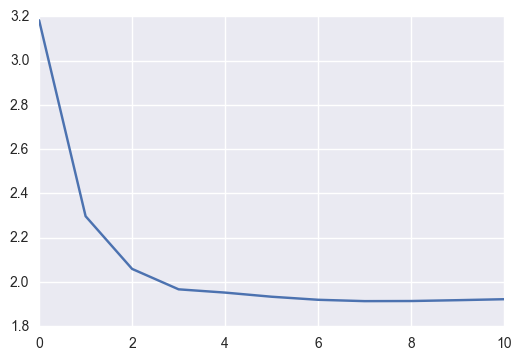

In [4]:
R = data
k = 1
cycles = 10
P, Q, err, n, m = alternating_lstsq(R, k, cycles)
M = R_to_M(n,m,R)
print("P")
print(P)
print("\nQ")
print(Q)
print("\nP * Q.T")
print(P.dot(Q.T))
print("\nM")
print(M)
print(len(err))




%matplotlib inline
plt.plot(err)

In [24]:
alist = np.arange(10)
np.random.seed(100)
np.random.shuffle(alist)
print(alist)
alist[2:]

[7 6 1 5 4 2 0 3 9 8]


array([1, 5, 4, 2, 0, 3, 9, 8])

In [27]:
alist[1:4]

array([6, 1, 5])

In [28]:
d = {1:alist}

In [29]:
d

{1: array([7, 6, 1, 5, 4, 2, 0, 3, 9, 8])}

In [32]:
type(alist)

numpy.ndarray